In [1]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


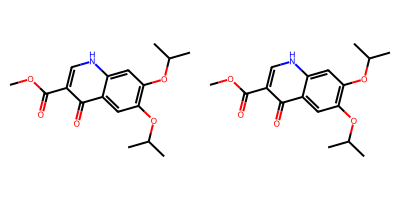

In [2]:
#test printing molecule
smiles = ['COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O', "COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [3]:
#import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [51]:
#make for each SMILES stirng, new object
data_properties = data_raw.copy()
data_properties['molecule_object'] = [Chem.MolFromSmiles(x) for x in data_properties['SMILES']]


#calculate properties of molecules
#useful link for this: https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
data_properties['num_atoms'] = [x.GetNumAtoms() for x in data_properties['molecule_object']]
data_properties['molecular_weight'] = [rdkit.Chem.rdMolDescriptors.CalcExactMolWt(x) for x in data_properties['molecule_object']]
data_properties['num_heavy_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumHeavyAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_amide_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumAmideBonds(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(x) for x in data_properties['molecule_object']]
data_properties['num_stereocenters'] = [rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_acceptors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBA(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_donors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBD(x) for x in data_properties['molecule_object']]
data_properties['num_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumRings(x) for x in data_properties['molecule_object']]
data_properties['num_rotatable_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumRotatableBonds(x) for x in data_properties['molecule_object']]

# Added by Kaj
data_properties['fraction_c_sp3'] = [rdkit.Chem.rdMolDescriptors.CalcFractionCSP3(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedRings(x) for x in data_properties['molecule_object']]
data_properties['num_spiro_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_aliphatic_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticRings(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticCarbocycles(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticHeterocycles(x) for x in data_properties['molecule_object']]
data_properties['num_bridgehead_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumBridgeheadAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_lipinski_H_bond_acceptors'] = [rdkit.Chem.rdMolDescriptors.CalcNumLipinskiHBA(x) for x in data_properties['molecule_object']]
data_properties['num_lipinski_H_bond_donors'] = [rdkit.Chem.rdMolDescriptors.CalcNumLipinskiHBD(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedCarbocycles(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedHeterocycles(x) for x in data_properties['molecule_object']]
data_properties['num_unspecified_stereo_center'] = [rdkit.Chem.rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(x) for x in data_properties['molecule_object']]
data_properties['phi'] = [rdkit.Chem.rdMolDescriptors.CalcPhi(x) for x in data_properties['molecule_object']]
data_properties['hall_kier_alpha'] = [rdkit.Chem.rdMolDescriptors.CalcHallKierAlpha(x) for x in data_properties['molecule_object']]

# Added by Liza
data_properties['autocorr_2d'] = [rdkit.Chem.rdMolDescriptors.CalcAUTOCORR2D(x) for x in data_properties['molecule_object']]
data_properties['chi0n'] = [rdkit.Chem.rdMolDescriptors.CalcChi0n(x) for x in data_properties['molecule_object']]
data_properties['chi0v'] = [rdkit.Chem.rdMolDescriptors.CalcChi0v(x) for x in data_properties['molecule_object']]
data_properties['chi1n'] = [rdkit.Chem.rdMolDescriptors.CalcChi1n(x) for x in data_properties['molecule_object']]
data_properties['chi1v'] = [rdkit.Chem.rdMolDescriptors.CalcChi1v(x) for x in data_properties['molecule_object']]
data_properties['chi2n'] = [rdkit.Chem.rdMolDescriptors.CalcChi2n(x) for x in data_properties['molecule_object']]
data_properties['chi2v'] = [rdkit.Chem.rdMolDescriptors.CalcChi2v(x) for x in data_properties['molecule_object']]
data_properties['chi3n'] = [rdkit.Chem.rdMolDescriptors.CalcChi3n(x) for x in data_properties['molecule_object']]
data_properties['chi3v'] = [rdkit.Chem.rdMolDescriptors.CalcChi3v(x) for x in data_properties['molecule_object']]
data_properties['chi4n'] = [rdkit.Chem.rdMolDescriptors.CalcChi4n(x) for x in data_properties['molecule_object']]
data_properties['chi4v'] = [rdkit.Chem.rdMolDescriptors.CalcChi4v(x) for x in data_properties['molecule_object']]
data_properties['crippen_descriptors'] = [rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(x) for x in data_properties['molecule_object']]
data_properties['kappa1'] = [rdkit.Chem.rdMolDescriptors.CalcKappa1(x)for x in data_properties['molecule_object']]
data_properties['kappa2'] = [rdkit.Chem.rdMolDescriptors.CalcKappa2(x)for x in data_properties['molecule_object']]
data_properties['kappa3'] = [rdkit.Chem.rdMolDescriptors.CalcKappa3(x)for x in data_properties['molecule_object']]
data_properties['kappa3'] = [rdkit.Chem.rdMolDescriptors.CalcKappa3(x)for x in data_properties['molecule_object']]
data_properties['molformula'] = [rdkit.Chem.rdMolDescriptors.CalcMolFormula(x)for x in data_properties['molecule_object']]
data_properties['num_aliphatic_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticCarbocycles(x)for x in data_properties['molecule_object']]
data_properties['num_aliphatic_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticHeterocycles(x)for x in data_properties['molecule_object']]

data_properties.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,molecule_object,num_atoms,molecular_weight,num_heavy_atoms,num_amide_bonds,num_aromatic_rings,num_stereocenters,...,chi3v,chi4n,chi4v,crippen_descriptors,kappa1,kappa2,kappa3,molformula,num_aliphatic_carbocycles,num_aliphatic_heteroocycles
0,C=C(C)c1nc(N)nc(N)n1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001D271A...,11,151.085795,11,0,1,0,...,1.051723,0.600230,0.600230,"(0.06909999999999988, 43.3598)",7.456952,2.531038,1.635047,C6H9N5,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001D2718...,17,250.039672,17,0,2,0,...,2.427385,1.556670,1.611225,"(3.2327200000000014, 67.70900000000002)",11.736876,4.634332,2.683837,C13H11ClO3,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001D2718...,15,210.136828,15,2,0,0,...,1.694814,0.958288,0.958288,"(0.7610999999999999, 60.26440000000003)",13.420000,8.993915,8.742061,C11H18N2O2,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001D2718...,17,232.084792,17,0,2,0,...,2.439419,1.586949,1.586949,"(0.5579200000000001, 63.549000000000035)",11.193326,4.288212,1.753868,C12H12N2O3,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,<rdkit.Chem.rdchem.Mol object at 0x000001D2718...,15,226.050905,15,0,1,0,...,2.091973,1.178089,1.397909,"(1.0353999999999997, 60.36600000000001)",11.524349,4.794989,2.274281,C10H11ClN2O2,0,0


In [52]:
one_molecule = data_properties['molecule_object'].iloc[0]
a = rdkit.Chem.rdMolDescriptors.CalcExactMolWt(one_molecule)
